In [1]:
import numpy as np, xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl, cartopy.mpl.ticker
import cartopy.crs as ccrs
import cartopy
import palettable
import importlib
import matplotlib.patches as mpatches
from matplotlib.path import Path

In [6]:
from plotIGCM import nemo

## Read coastlines

In [7]:
dd = xr.open_dataset ( 'orca2.3_coastline.nc' )
dm = xr.open_dataset ('/Users/marti/GRAF/DATA/ORCA2.3_coordinates_mask.nc') ; nperio = 4 ; Model = 'orca2.3' 
f_Coord = '/Users/marti/GRAF/DATA/coordinates_ORCA2.3.nc'

#dd = xr.open_dataset ('eORCA025_coastline.nc')
lat_coast = dd ['lat_coast']
lon_coast = dd ['lon_coast']

In [8]:
lat_coast

<xarray.DataArray 'lat_coast' (coastal_point: 2362)> Size: 9kB
[2362 values with dtype=float32]
Dimensions without coordinates: coastal_point
Attributes:
    name:       Latitude
    units:      degrees_north
    long_name:  Latitude of coast line

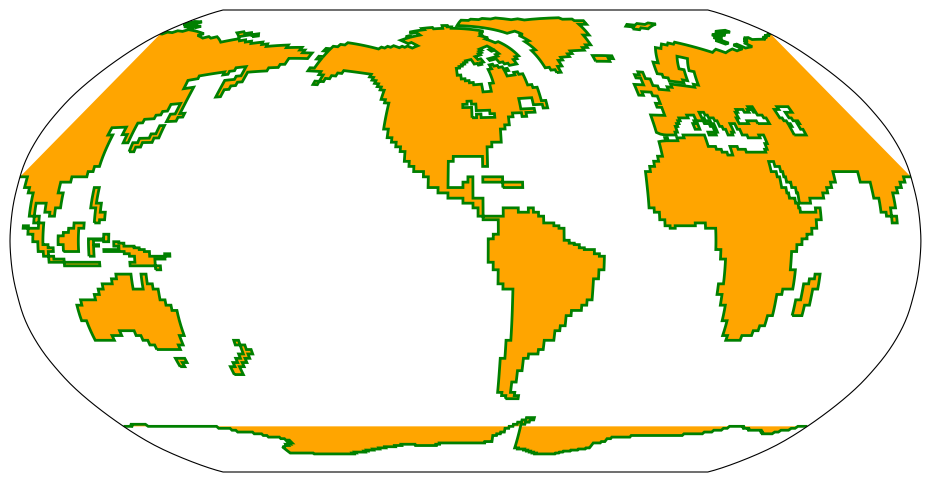

In [9]:
# Earth radius
ra = 40.0e6/(2.0*np.pi)

ProjIn = ccrs.PlateCarree(central_longitude=0)

lon0=270

#ProjPlot = ccrs.PlateCarree               (central_longitude=lon0)
ProjPlot = ccrs.Robinson                  (central_longitude=lon0)
#ProjPlot = ccrs.AzimuthalEquidistant      (central_longitude=lon0)
#ProjPlot = ccrs.InterruptedGoodeHomolosine(central_longitude=lon0)
#ProjPlot = ccrs.LambertAzimuthalEqualArea (central_longitude=lon0)
#ProjPlot = ccrs.AlbersEqualArea           (central_longitude=lon0)
#ProjPlot = ccrs.Stereographic             (central_longitude=lon0, central_latitude=40)
#ProjPlot = ccrs.Mollweide                 (central_longitude=lon0)
#ProjPlot = ccrs.NorthPolarStereo          (central_longitude=lon0)
#ProjPlot = ccrs.LambertConformal          (central_longitude=lon0, cutoff=-30)
#ProjPlot = ccrs.Orthographic              (central_longitude=lon0, central_latitude=90)
#ProjPlot = ccrs.EckertVI                  (central_longitude=lon0) 
#ProjPlot = ccrs.EquidistantConic          (central_longitude=lon0)
#ProjPlot = ccrs.RotatedPole      (pole_longitude=lon0, pole_latitude=60.0, central_rotated_longitude=lon0)
#ProjPlot = ccrs.RotatedPole      (pole_longitude=lon0, pole_latitude= 0.0, central_rotated_longitude=lon0)

fig = plt.figure ( figsize=(18, 6) )

ax = fig.add_subplot (1, 1, 1, projection=ProjPlot)
    
#ax.plot (lon_coast, lat_coast, linewidth=0.1, alpha=0.5, color='red' , transform=ProjIn)
ax.set_global()

poly_corners = np.stack ( [lon_coast, lat_coast]).transpose()[0:]

codes = np.zeros (len(poly_corners), dtype=int)
codes[ :] = Path.LINETO
codes[ 0] = Path.MOVETO
codes[-1] = Path.CLOSEPOLY

codes = np.where ( np.isnan(poly_corners[:,0]), Path.MOVETO, codes  )

path = Path (poly_corners, codes)

#poly = mpatches.Polygon(poly_corners, closed=True, ec='b', fill=True, lw=1, fc="yellow", transform=ProjIn)
#ax.add_patch(poly)
patch = mpatches.PathPatch (path, facecolor='orange', edgecolor='green', lw=2, transform=ProjIn)
ax.add_patch (patch)

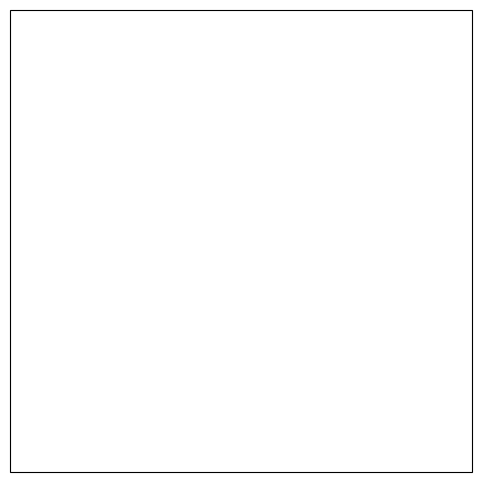

In [10]:
# Earth radius
ra = 40.0e6/(2.0*np.pi)

ProjIn = ccrs.PlateCarree(central_longitude=0)
#ProjIn = ccrs.Geodetic()
lon0=270

ProjPlot = ccrs.Robinson (central_longitude=lon0)
fig = plt.figure ( figsize=(18, 6) )

ax = fig.add_subplot (1, 1, 1, projection=ProjPlot)

nav_lon_grid_T = nemo.fixed_lon (dm['nav_lon_grid_T'])
mask_T = nemo.lbc_mask ( dm['mask_T'], nperio=nperio, cd_type='T')

#mm = ax.fill (lon_coast, lat_coast, transform=ProjIn, color='lightgray', lw=0.5, edgecolor="black")

patch = mpatches.PathPatch (path, facecolor='orange', edgecolor='green', lw=2, transform=ProjIn)
ax.add_patch (patch)


In [15]:
poly_corners[12]

array([162.99931, -75.71467], dtype=float32)

Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.
Ill-defined clip_path detected. Returning None.


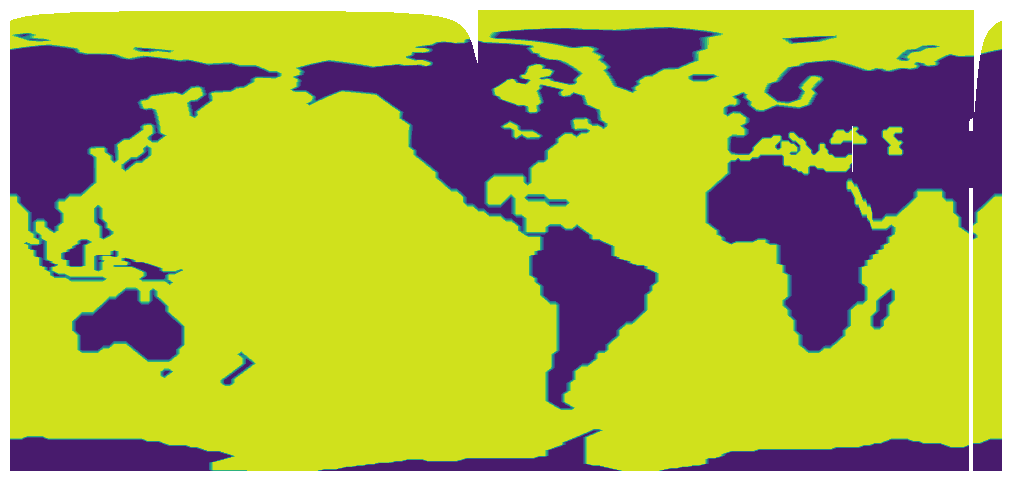

In [16]:
# Earth radius
ra = 40.0e6/(2.0*np.pi)

ProjIn = ccrs.PlateCarree(central_longitude=0)

lon0=270

ProjPlot = ccrs.PlateCarree               (central_longitude=lon0)
#ProjPlot = ccrs.Robinson                  (central_longitude=lon0)
#ProjPlot = ccrs.AzimuthalEquidistant      (central_longitude=lon0)
#ProjPlot = ccrs.InterruptedGoodeHomolosine(central_longitude=lon0)
#ProjPlot = ccrs.LambertAzimuthalEqualArea (central_longitude=lon0)
#ProjPlot = ccrs.AlbersEqualArea           (central_longitude=lon0)
#ProjPlot = ccrs.Stereographic             (central_longitude=lon0, central_latitude=40)
#ProjPlot = ccrs.Mollweide                 (central_longitude=lon0)
#ProjPlot = ccrs.NorthPolarStereo          (central_longitude=lon0)
#ProjPlot = ccrs.LambertConformal          (central_longitude=lon0, cutoff=-30)
#ProjPlot = ccrs.Orthographic              (central_longitude=lon0, central_latitude=90)
#ProjPlot = ccrs.EckertVI                  (central_longitude=lon0) 
#ProjPlot = ccrs.EquidistantConic          (central_longitude=lon0)
#ProjPlot = ccrs.RotatedPole      (pole_longitude=lon0, pole_latitude=60.0, central_rotated_longitude=lon0)
#ProjPlot = ccrs.RotatedPole      (pole_longitude=lon0, pole_latitude= 0.0, central_rotated_longitude=lon0)

fig = plt.figure ( figsize=(18, 6) )

ax = fig.add_subplot (1, 1, 1, projection=ProjPlot)

nav_lon_grid_T = nemo.fixed_lon (dm['nav_lon_grid_T'])
mask_T = nemo.lbc_mask ( dm['mask_T'], nperio=nperio, cd_type='T')

mm = ax.contourf (nav_lon_grid_T , dm['nav_lat_grid_T'], mask_T, transform=ProjIn )

#mm.set_clip_path (path)
#ax.add_patch(path)

ax.set_boundary (path, transform=ax.transAxes)


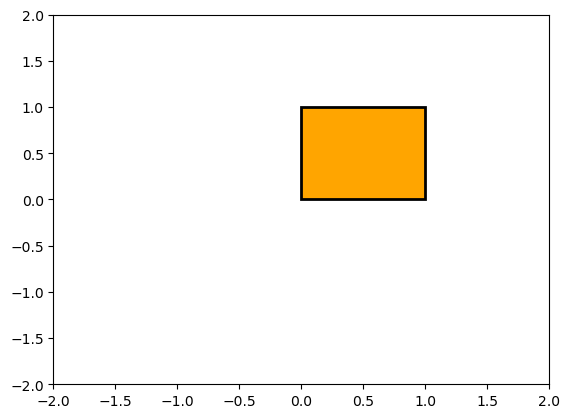

In [11]:
verts = [
   (0., 0.),  # left, bottom
   (0., 1.),  # left, top
   (1., 1.),  # right, top
   (1., 0.),  # right, bottom
   (0., 0.),  # ignored
]

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO,
    Path.LINETO,
    Path.CLOSEPOLY,
]

path = Path(verts, codes)

fig, ax = plt.subplots()
patch = mpatches.PathPatch(path, facecolor='orange', lw=2)
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [12]:
cartopy.__version__

'0.24.0'

In [19]:
cartopy.__version__ < '0.19'

False